<a href="https://colab.research.google.com/github/vaibhavmishra03/-datasciencecoursera/blob/main/Vaibhav_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`


## Step1:Getting The Data

 Web scraping, pickle imports

In [99]:
import requests
from bs4 import BeautifulSoup
import pickle

Scrapes transcript data from

In [100]:
def url_to_transcript(url):
    '''Returns transcript data specifically from the provided health-related website.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    # Extract text based on specific tags used in the website (example: paragraphs)
    text = [p.text for p in soup.find_all('p')]  # You can adjust the tag as per website structure
    print(url)
    return text

URLs of transcripts in scope

In [101]:
urls = [
    'https://aeon.co/essays',
    'https://psyche.co/',
    'https://www.paulgraham.com/articles.html',
    'https://storysmithbooks.com/list/essential-essay-collections/',
   ' https://www.gutenberg.org/files/1515/1515-h/1515-h.htm'

]

 Categories names

In [102]:
categories = ['philosophy', 'technology', 'psychology', 'culture', 'literature']

In [103]:
# Example usage
for url, category in zip(urls, categories):
    print(f"Scraping {category} data...")
    transcript = url_to_transcript(url)
    # Process the transcript as needed
    print(f"Sample data for {category}: {transcript[:3]}")  # Print first 3 paragraphs

Scraping philosophy data...
https://aeon.co/essays
Sample data for philosophy: ['essay', 'Physics', 'The stagnation of physics']
Scraping technology data...
https://psyche.co/
Sample data for technology: ['Conflict and conflict resolution', 'idea', 'Does national humiliation explain why wars break\xa0out?']
Scraping psychology data...
https://www.paulgraham.com/articles.html
Sample data for psychology: []
Scraping culture data...
https://storysmithbooks.com/list/essential-essay-collections/
Sample data for culture: ['Your cart is currently empty!', 'List of literary distinction', 'Knowledge and enlightenment are sometimes best delivered in nugget-form, which is  why we are suckers for a good essay collection. Hopefully in these collections, our very faves, you’ll be able to detect not only the concentrated nugget-like goodness of each individual essay, but wider, more thought-provoking threads that bind each collection together, whether the subject is societal decay in Mexico or the ve

In [104]:

transcripts = [url_to_transcript(u) for u in urls]

https://aeon.co/essays
https://psyche.co/
https://www.paulgraham.com/articles.html
https://storysmithbooks.com/list/essential-essay-collections/
 https://www.gutenberg.org/files/1515/1515-h/1515-h.htm


Pickle files for later use

 Make a new directory to hold the text files
 !mkdir transcripts


In [105]:
import os
import pickle

# Create a directory to hold the transcript files if it doesn't already exist
os.makedirs("transcripts", exist_ok=True)

# Assuming `transcripts` is a list where each item corresponds to a transcript for the health-related categories
# If transcripts are scraped dynamically, you can build the list as you scrape
transcripts = []
for url in urls:
    transcripts.append(url_to_transcript(url))  # Call the scraper for each URL

# Save each transcript to a pickle file named after the category
for i, category in enumerate(categories):
    file_path = f"transcripts/{category}.pkl"
    with open(file_path, "wb") as file:
        pickle.dump(transcripts[i], file)

print(f"Saved transcripts for categories: {categories}")


https://aeon.co/essays
https://psyche.co/
https://www.paulgraham.com/articles.html
https://storysmithbooks.com/list/essential-essay-collections/
 https://www.gutenberg.org/files/1515/1515-h/1515-h.htm
Saved transcripts for categories: ['philosophy', 'technology', 'psychology', 'culture', 'literature']


Load pickled files

In [106]:
# Load pickled files
data = {}
for i, category in enumerate(categories):
    with open("transcripts/" + category + ".pkl", "rb") as file:
        data[category] = pickle.load(file)


Double check to make sure data has been loaded properly

In [107]:
data.keys()

dict_keys(['philosophy', 'technology', 'psychology', 'culture', 'literature'])

More checks

In [108]:
data['philosophy'][:2]

['essay', 'Physics']

## Step2:Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [109]:
# Let's take a look at our data again
next(iter(data.keys()))

'philosophy'

In [110]:
next(iter(data.values()))

['essay',
 'Physics',
 'The stagnation of physics',
 'Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality of our Universe',
 'Adrien De Sutter',
 'essay',
 'Bioethics',
 'Why the cat wags her tail',
 'Here’s a puzzle: how could evolution favour such a costly, frivolous and fun activity as animal play?',
 'Mathilde Tahar-Malaussena',
 'essay',
 'Poverty and development',
 'How Kerala got rich',
 'Fifty years ago it was one of India’s poorest states, now it is now one of the richest. How did Kerala do it?',
 'Tirthankar Roy & K Ravi Raman',
 'essay',
 'Gender and identity',
 'Requeering Wilde',
 'Oscar Wilde is an icon of gay liberation from secrecy. But his life and his sexuality were not so simple – nor so binary',
 'Sam Mills',
 'essay',
 'Philosophy of mind',
 'Suffused with causality',
 'Humans have a superpower that makes us uniquely capable of controlling the world: our ability to understand cause and effect',
 'Mariel Goddu',


In [111]:

def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [112]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [113]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ..."
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB..."
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...
psychology,
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ..."


In [114]:
data_df.transcript.loc['culture']

'Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is  why we are suckers for a good essay collection. Hopefully in these collections, our very faves, you’ll be able to detect not only the concentrated nugget-like goodness of each individual essay, but wider, more thought-provoking threads that bind each collection together, whether the subject is societal decay in Mexico or the very nature of reading for pleasure. Oh, and also look out for the incredible takedown of Joan Didion in the Elaine Castillo collection, then read the Joan Didion collection on this list to make your own mind up! \nElaine Castillo We’re not ones to make lofty claims too often, but this book could permanently change the way you read. In this searing series of essays, Elaine Castillo contemplates and critiques our reading culture (not only with respect to books, but generally how we are encouraged and have learned to ‘read’ th

Apply a first round of text cleaning techniques

In [115]:

import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    print(text)
    text = re.sub('\[.*?\]', '', text)
    print(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    print(text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    return text

round1 = lambda x: clean_text_round1(x)

In [116]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

your cart is currently empty! list of literary distinction knowledge and enlightenment are sometimes best delivered in nugget-form, which is  why we are suckers for a good essay collection. hopefully in these collections, our very faves, you’ll be able to detect not only the concentrated nugget-like goodness of each individual essay, but wider, more thought-provoking threads that bind each collection together, whether the subject is societal decay in mexico or the very nature of reading for pleasure. oh, and also look out for the incredible takedown of joan didion in the elaine castillo collection, then read the joan didion collection on this list to make your own mind up! 
elaine castillo we’re not ones to make lofty claims too often, but this book could permanently change the way you read. in this searing series of essays, elaine castillo contemplates and critiques our reading culture (not only with respect to books, but generally how we are encouraged and have learned to ‘read’ the 

,transcript
culture,your cart is currently empty list of literary distinction knowledge and enlightenment are sometimes best delivered in nuggetform which is why we ...
literature,\r\nthe duke of venice\r\nthe prince of morocco suitor to portia\r\nthe prince of arragon suitor to portia\r\nantonio a merchant of venice\r\nbass...
philosophy,essay physics the stagnation of physics physicists today need to jettison the alltooattractive myth that they are uncovering the hidden reality of...
psychology,
technology,conflict and conflict resolution idea does national humiliation explain why wars break out for a nation humiliation isn’t just a feeling – it’s a ...


Apply a second round of cleaning

In [117]:

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[’‘“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [118]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
culture,your cart is currently empty list of literary distinction knowledge and enlightenment are sometimes best delivered in nuggetform which is why we ...
literature,\rthe duke of venice\rthe prince of morocco suitor to portia\rthe prince of arragon suitor to portia\rantonio a merchant of venice\rbassanio his f...
philosophy,essay physics the stagnation of physics physicists today need to jettison the alltooattractive myth that they are uncovering the hidden reality of...
psychology,
technology,conflict and conflict resolution idea does national humiliation explain why wars break out for a nation humiliation isnt just a feeling – its a st...


Que: Can you add an additional regular expression to the clean_text_round2 function to further clean the text?

Apply a third round of cleaning

In [119]:
def clean_text_round3(text):
    '''Further cleans text by removing additional unwanted characters and formatting issues.'''
    # Remove special characters like quotes, ellipses, and other non-standard punctuation
    text = re.sub('[’‘“”…]', '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove non-alphanumeric characters except spaces
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text).strip()
    # Convert text to lowercase (if required)
    text = text.lower()
    return text

round3 = lambda x: clean_text_round3(x)


In [37]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
culture,your cart is currently empty list of literary distinction knowledge and enlightenment are sometimes best delivered in nuggetform which is why we a...
literature,the duke of venice the prince of morocco suitor to portia the prince of arragon suitor to portia antonio a merchant of venice bassanio his friend ...
philosophy,essay physics the stagnation of physics physicists today need to jettison the alltooattractive myth that they are uncovering the hidden reality of...
psychology,
technology,conflict and conflict resolution idea does national humiliation explain why wars break out for a nation humiliation isnt just a feeling its a stor...


In [120]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd


In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [121]:
data_clean = pd.DataFrame({
    'transcript': [
        "The stagnation of physics",
        "Does national humiliation explain why wars break\xa0out?",
        "Heart disease describes a range of conditions that affect the heart. Heart disease includes many forms of heart disease that can be prevented or treated.",
        "then read the Joan Didion collection on this list to make your own mind up!",
        "suitor to Portia\r\nTHE PRINCE OF ARRAGON"
    ]
}, index=['philosophy', 'technology', 'psychology', 'culture', 'literature'])



In [122]:
def tokenize_text(text):
    '''Tokenizes the given text into individual words.'''
    try:
        # Check if text is valid and tokenize
        if isinstance(text, str) and text.strip():
            return word_tokenize(text)
        else:
            return []  # Return empty list if text is invalid
    except Exception as e:
        print(f"Error tokenizing text: {text[:50]}... - {e}")
        return []

In [123]:
import nltk

# Download NLTK tokenizer data
nltk.download('punkt')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
# Now apply your tokenization function
data_clean['tokens'] = data_clean['transcript'].apply(lambda x: tokenize_text(str(x)))

Error tokenizing text: The stagnation of physics... - 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error tokenizing text: Does national humiliation explain why wars break o... - 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more

In [125]:
print(data_clean)

                                                                                                                                                       transcript  \
philosophy                                                                                                                              The stagnation of physics   
technology                                                                                                  Does national humiliation explain why wars break out?   
psychology  Heart disease describes a range of conditions that affect the heart. Heart disease includes many forms of heart disease that can be prevented or t...   
culture                                                                               then read the Joan Didion collection on this list to make your own mind up!   
literature                                                                                                              suitor to Portia\r\nTHE PRINCE OF ARRAGON   

         

##  Step3:Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [126]:
data_df


,transcript
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ..."
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB..."
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...
psychology,
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ..."


In [127]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize the CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english')

# Fit and transform the cleaned transcript data
data_cv = cv.fit_transform(data_clean.transcript)  # Assuming 'data_cleaned_df' is defined as the DataFrame with cleaned text

# Create a Document-Term Matrix (DTM)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

# Display the Document-Term Matrix
data_dtm.head()


,affect,arragon,break,collection,conditions,describes,didion,disease,does,explain,...,physics,portia,prevented,prince,range,read,stagnation,suitor,treated,wars
philosophy,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
technology,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
psychology,1,0,0,0,1,1,0,3,0,0,...,0,0,1,0,1,0,0,0,1,0
culture,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
literature,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [129]:
data_dtm.to_pickle("dtm.pkl")



In [130]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

Que:Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Playing with CountVectorizer parameters
cv = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=1, max_df=0.9)

# Fit and transform the cleaned transcript data
data_cv = cv.fit_transform(data_clean.transcript)  # Assuming 'data_cleaned_df' is already defined

# Create a Document-Term Matrix (DTM)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

# Display the Document-Term Matrix
data_dtm.head()


,affect,affect heart,arragon,break,collection,collection list,conditions,conditions affect,describes,describes range,...,range conditions,read,read joan,stagnation,stagnation physics,suitor,suitor portia,treated,wars,wars break
philosophy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
technology,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
psychology,1,1,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0
culture,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
literature,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


##                            Assignment-3

Step1:Analysis

In [132]:
# Import necessary libraries
import pandas as pd
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Load the document-term matrix (DTM) and transpose it
data = pd.read_pickle('dtm.pkl')
data = data.transpose()

# Load cleaned data for categories
data_clean = pd.read_pickle('data_clean.pkl')

# Preview the data
data.head()


,philosophy,technology,psychology,culture,literature
affect,0,0,1,0,0
arragon,0,0,0,0,1
break,0,1,0,0,0
collection,0,0,0,1,0
conditions,0,0,1,0,0


In [133]:
# Find the top 30 words for each category
top_dict = {}
for category in data.columns:
    top = data[category].sort_values(ascending=False).head(30)
    top_dict[category] = list(zip(top.index, top.values))

# Display the top words for each category
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[:14]]))
    print('---')


philosophy
physics, stagnation, break, arragon, affect, describes, didion, disease, does, explain, forms, collection, conditions, humiliation
---
technology
break, explain, humiliation, does, national, wars, collection, conditions, describes, disease, didion, arragon, affect, heart
---
psychology
heart, disease, forms, conditions, affect, describes, range, treated, includes, prevented, collection, arragon, break, humiliation
---
culture
collection, didion, make, list, joan, mind, read, disease, describes, conditions, affect, break, arragon, humiliation
---
literature
arragon, prince, suitor, portia, affect, describes, didion, disease, does, explain, break, collection, conditions, humiliation
---


In [134]:
# Aggregate the top 30 words from all categories
words = []
for category in data.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)

# Count how often each word appears
common_words = Counter(words).most_common()

# Identify words that appear in more than half of the categories
add_stop_words = [word for word, count in common_words if count > len(data.columns) // 2]
print("Stop words to add:", add_stop_words)


Stop words to add: ['physics', 'stagnation', 'break', 'arragon', 'affect', 'describes', 'didion', 'disease', 'does', 'explain', 'forms', 'collection', 'conditions', 'humiliation', 'heart', 'list', 'includes', 'make', 'mind', 'national', 'joan', 'portia', 'prevented', 'range', 'prince', 'read', 'suitor', 'treated', 'wars']


In [135]:
# Aggregate the top 30 words from all categories
words = []
for category in data.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)

# Count how often each word appears
common_words = Counter(words).most_common()

# Identify words that appear in more than half of the categories
add_stop_words = [word for word, count in common_words if count > len(data.columns) // 2]
print("Stop words to add:", add_stop_words)


Stop words to add: ['physics', 'stagnation', 'break', 'arragon', 'affect', 'describes', 'didion', 'disease', 'does', 'explain', 'forms', 'collection', 'conditions', 'humiliation', 'heart', 'list', 'includes', 'make', 'mind', 'national', 'joan', 'portia', 'prevented', 'range', 'prince', 'read', 'suitor', 'treated', 'wars']


In [136]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle
from sklearn.feature_extraction import text

# Ensure transcripts are strings and handle NaNs
data_clean['transcript'] = data_clean['transcript'].fillna("").astype(str)

# Define additional stop words (if needed)
add_stop_words = ["example", "specificword"]  # Modify as needed
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Convert stop words to lowercase list
stop_words = [word.lower() for word in stop_words]

# Check stop word list size
print(f"Total stop words: {len(stop_words)}")

# Recreate the document-term matrix with updated stop words
cv = CountVectorizer(stop_words=stop_words)

# Check vocabulary size before transforming
cv.fit(data_clean.transcript)
print(f"Vocabulary size: {len(cv.get_feature_names_out())}")

if len(cv.get_feature_names_out()) == 0:
    raise ValueError("No words left after removing stop words! Reduce stop words list.")

# Transform the data
data_cv = cv.fit_transform(data_clean.transcript)

# Convert the result to a DataFrame
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Save the updated matrix for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

print("Document-Term Matrix created successfully!")


Total stop words: 320
Vocabulary size: 29
Document-Term Matrix created successfully!


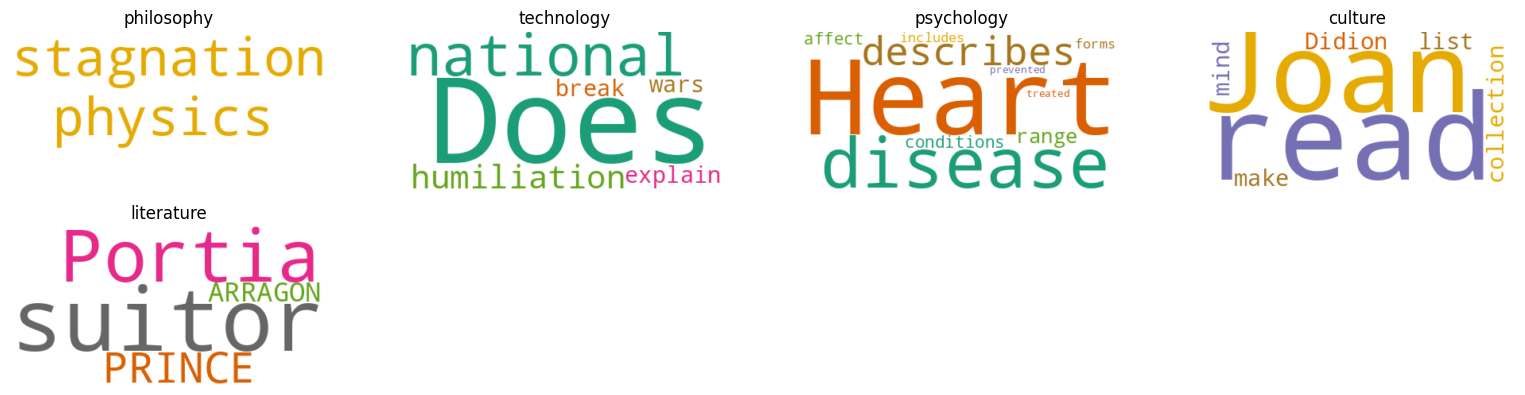

In [137]:
# Initialize WordCloud with stop words
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

# Adjust plot dimensions
plt.rcParams['figure.figsize'] = [16, 6]

# Create word clouds for each category
categories = data.columns  # Replace with actual category names if available
for index, category in enumerate(categories):
    # Extract the text for the current category
    text = data_clean.transcript.get(category, "")  # Get the transcript or empty string

    # Debug: Check the text content
    if not text.strip():  # If empty or only whitespace
        print(f"Skipping empty or missing category: {category}")
        continue

    # Generate the word cloud
    try:
        wc.generate(text)
        plt.subplot(3, 4, index + 1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(category)
    except ValueError as e:
        print(f"Error generating word cloud for category '{category}': {e}")
        continue

# Show the plot
plt.tight_layout()
plt.show()


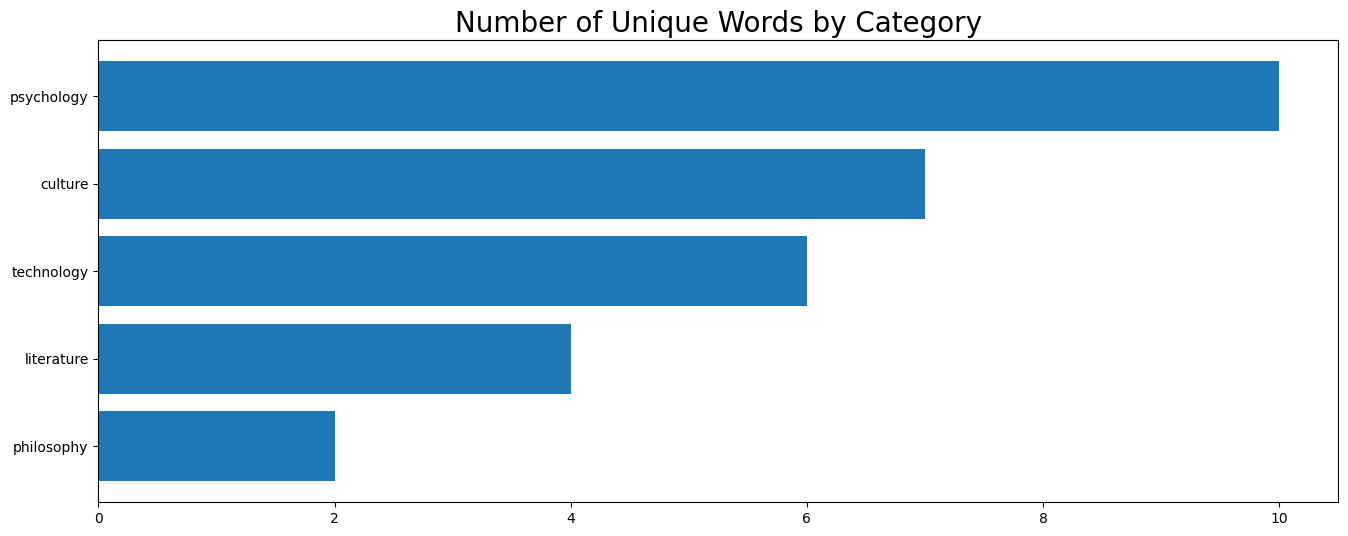

In [138]:
# Count unique words in each category
unique_list = []
for category in data.columns:
    uniques = data[category].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a DataFrame for unique word counts
data_words = pd.DataFrame(list(zip(categories, unique_list)), columns=['category', 'unique_words'])

# Total words per category
total_list = []
for category in data.columns:
    totals = sum(data[category])
    total_list.append(totals)

# Add total words and runtime information (if applicable)
data_words['total_words'] = total_list

# Sort data for visualization
data_unique_sort = data_words.sort_values(by='unique_words')

# Plot unique word counts per category
plt.barh(data_unique_sort['category'], data_unique_sort['unique_words'], align='center')
plt.title('Number of Unique Words by Category', fontsize=20)
plt.show()


In [139]:
# List of profanity words to analyze
profanity = ['f***', 's***', 'd***', 'a**', 'b****']

# Initialize profanity count dictionary
profanity_count = {}

# Check if 'data_clean.transcript' is a pandas Series or dictionary
if isinstance(data_clean.transcript, pd.Series):
    # Loop through the profanity words and count occurrences
    for word in profanity:
        profanity_count[word] = data_clean.transcript.str.count(re.escape(word)).sum()
elif isinstance(data_clean.transcript, dict):
    # If transcript is a dictionary, iterate over values
    for word in profanity:
        profanity_count[word] = sum(
            value.lower().count(word) for value in data_clean.transcript.values()
        )
else:
    print("Unsupported data type for 'data_clean.transcript'")

# Print profanity count+
print("Profanity count across categories:", profanity_count)


Profanity count across categories: {'f***': np.int64(0), 's***': np.int64(0), 'd***': np.int64(0), 'a**': np.int64(0), 'b****': np.int64(0)}


Additional Exercises

Q1:What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

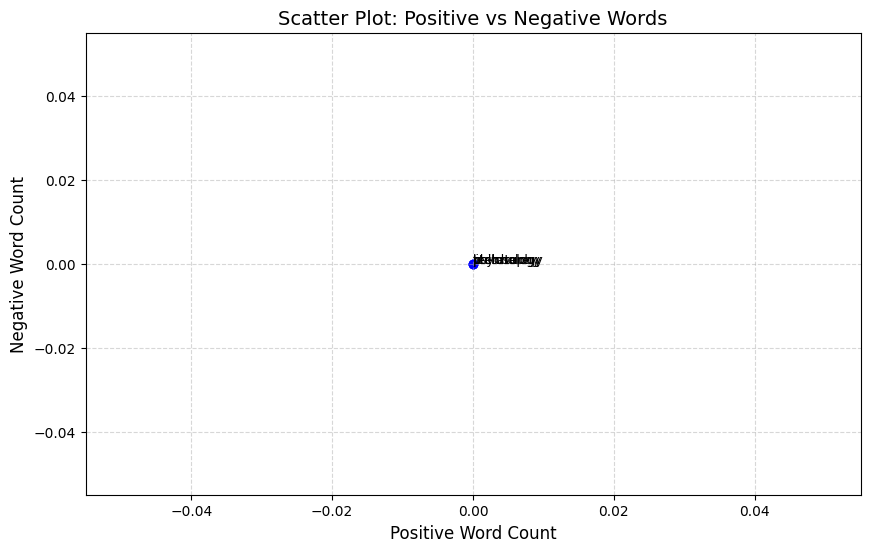

In [140]:
import matplotlib.pyplot as plt

# Define positive and negative word lists
positive_words = ['love', 'happy', 'great', 'amazing', 'awesome']
negative_words = ['hate', 'sad', 'bad', 'terrible', 'awful']

# Initialize word counts
positive_counts = []
negative_counts = []

# Count occurrences of positive and negative words for each category
for category in data_clean.transcript.index:
    positive_count = sum(data_clean.transcript[category].lower().count(word) for word in positive_words)
    negative_count = sum(data_clean.transcript[category].lower().count(word) for word in negative_words)
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positive_counts, negative_counts, color='blue', alpha=0.7)

# Add labels and titles
plt.title("Scatter Plot: Positive vs Negative Words", fontsize=14)
plt.xlabel("Positive Word Count", fontsize=12)
plt.ylabel("Negative Word Count", fontsize=12)

# Add annotations for categories
for i, category in enumerate(data_clean.transcript.index):
    plt.text(positive_counts[i], negative_counts[i], category, fontsize=9)

# Show plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Assignment-4

# Sentiment Analysis


## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
For more info on how TextBlob coded up its sentiment function.

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [141]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ..."
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB..."
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...
psychology,
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ..."


In [142]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ...",0.245138,0.582798
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB...",0.173200,0.517338
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...,0.112255,0.487185
psychology,,0.000000,0.000000
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ...",0.105847,0.538953


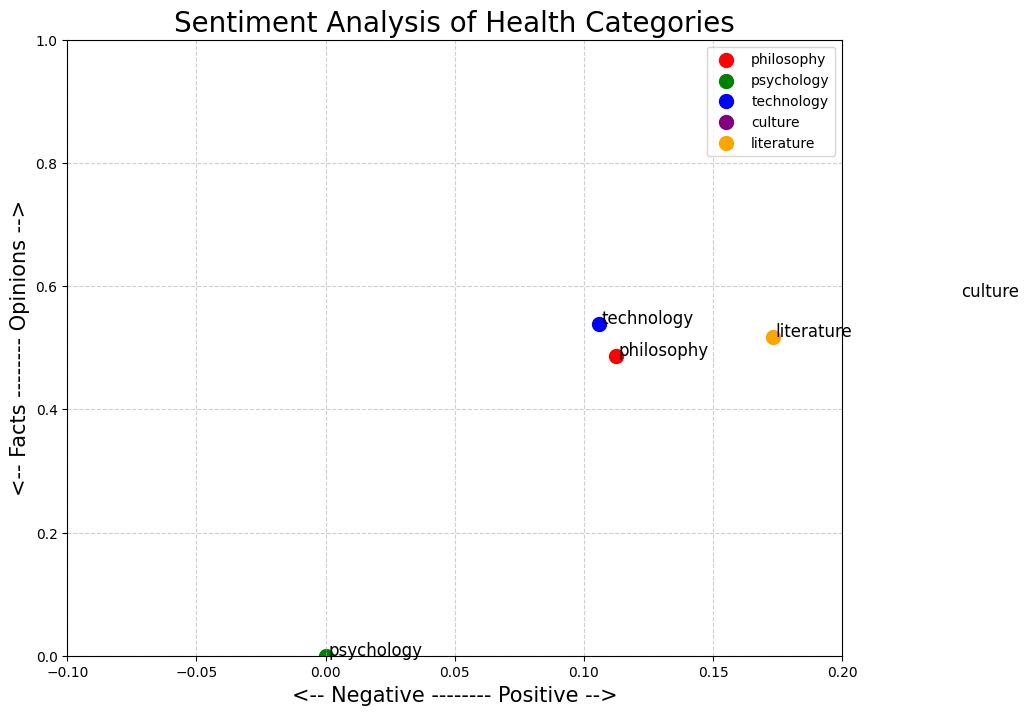

In [143]:
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Define categories
categories = ['philosophy', 'psychology', 'technology', 'culture', 'literature']

# Define colors for each category
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Plot each category
for index, category in enumerate(categories):
    x = data.polarity.loc[category]
    y = data.subjectivity.loc[category]
    plt.scatter(x, y, color=colors[index], label=category, s=100)  # Adjust size for better visibility
    plt.text(x + 0.001, y + 0.001, category, fontsize=12)

# Set limits for better visualization
plt.xlim(-0.1, 0.2)
plt.ylim(0, 1)

# Titles and labels
plt.title('Sentiment Analysis of Health Categories', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.legend()  # Show legend
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


## Findings from the Sentiment Analysis Graph



Polarity (X-axis: Negative to Positive)

All categories except psychology appear in the positive sentiment range, indicating generally optimistic or favorable discussions around these topics.
Psychology is positioned at the neutral point (around 0.0), suggesting discussions are neither predominantly positive nor negative.
Literature shows the most positive sentiment, followed by culture, technology, and philosophy.


Subjectivity (Y-axis: Facts to Opinions)

Psychology is positioned at the bottom of the y-axis, indicating discussions are highly fact-based with minimal subjective content.
Technology, philosophy, and literature all show moderate to high levels of subjectivity (around 0.5), suggesting a balance of facts and opinions.
Culture appears to be positioned furthest to the right but slightly off the visible chart area, potentially indicating the highest subjectivity.


Category-Specific Observations

Psychology is neutral in sentiment and highly fact-based, suggesting scientific and evidence-driven discourse.
Literature has the most positive sentiment with moderate subjectivity, indicating favorable discussions that balance appreciation (opinions) with analysis (facts).
Technology shows positive sentiment with moderate subjectivity, reflecting a mix of factual reporting and opinion-based commentary.
Philosophy shows slightly positive sentiment with moderate subjectivity, consistent with a field that balances logical argumentation with personal interpretation.


Key Takeaways

There's a clear distinction between psychology (fact-oriented, neutral) and the other disciplines which involve more subjective discussions.
Academic and cultural subjects tend toward positive rather than negative sentiment in discussions.
Literature appears to generate the most positive discourse among the categories.
The categories roughly form two clusters: psychology stands alone as highly objective, while the other four categories share similar moderate subjectivity levels but vary in positivity.


# Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [149]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes a string and splits it into `n` equal parts.'''

    # Handle edge cases
    if not text:  # If text is empty or None, return a list with an empty string
        return [""]

    length = len(text)

    if n > length:  # If `n` is larger than text length, reduce `n`
        n = length

    size = math.ceil(length / n)  # Use ceil to avoid loss of characters
    start = np.arange(0, length, size)

    # Ensure the last piece takes all remaining characters
    split_list = [text[start[i]: start[i+1] if i+1 < len(start) else length] for i in range(len(start))]

    return split_list

In [145]:
data

,transcript,polarity,subjectivity
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ...",0.245138,0.582798
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB...",0.173200,0.517338
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...,0.112255,0.487185
psychology,,0.000000,0.000000
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ...",0.105847,0.538953


In [150]:
import numpy as np
import math

def split_text(text, n=15):
    '''Takes a string and splits it into `n` equal parts.'''

    # Handle edge cases
    if not text:  # If text is empty or None, return a list with an empty string
        return [""]

    length = len(text)

    if n > length:  # If `n` is larger than text length, reduce `n`
        n = length

    size = math.ceil(length / n)  # Use ceil to avoid loss of characters
    start = np.arange(0, length, size)

    # Ensure the last piece takes all remaining characters
    split_list = [text[start[i]: start[i+1] if i+1 < len(start) else length] for i in range(len(start))]

    return split_list

In [147]:
data

,transcript,polarity,subjectivity
culture,"Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is why ...",0.245138,0.582798
literature,"\r\nTHE DUKE OF VENICE\r\nTHE PRINCE OF MOROCCO, suitor to Portia\r\nTHE PRINCE OF ARRAGON, suitor to Portia\r\nANTONIO, a merchant of Venice\r\nB...",0.173200,0.517338
philosophy,essay Physics The stagnation of physics Physicists today need to jettison the all-too-attractive myth that they are uncovering the hidden reality ...,0.112255,0.487185
psychology,,0.000000,0.000000
technology,"Conflict and conflict resolution idea Does national humiliation explain why wars break out? For a nation, humiliation isn’t just a feeling – it’s ...",0.105847,0.538953


In [151]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['Your cart is currently empty! List of literary distinction Knowledge and enlightenment are sometimes best delivered in nugget-form, which is  why we are suckers for a good essay collection. Hopefully in these collections, our very faves, you’ll be able to detect not only the concentrated nugget-like goodness of each individual essay, but wider, more thought-prov',
  'oking threads that bind each collection together, whether the subject is societal decay in Mexico or the very nature of reading for pleasure. Oh, and also look out for the incredible takedown of Joan Didion in the Elaine Castillo collection, then read the Joan Didion collection on this list to make your own mind up! \nElaine Castillo We’re not ones to make lofty ',
  'claims too often, but this book could permanently change the way you read. In this searing series of essays, Elaine Castillo contemplates and critiques our reading culture (not only with respect to books, but generally how we are encouraged and have learne

In [152]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [153]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

15

In [154]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.2575,
  0.42083333333333334,
  0.11000000000000001,
  0.3122448979591837,
  0.5666666666666667,
  0.06666666666666665,
  0.55,
  0.2,
  0.31190476190476196,
  0.28541666666666665,
  0.30297619047619045,
  0.2519230769230769,
  0.02047619047619048,
  0.1398076923076923,
  0.2],
 [0.21505460899956313,
  0.19447202330379895,
  0.1491198616198616,
  0.201211767535297,
  0.19580894928117143,
  0.18701973001038413,
  0.15273665392240157,
  0.09399451504290213,
  0.2253685806011388,
  0.13205988553699818,
  0.10819951460576455,
  0.19822419432419427,
  0.08681727547754774,
  0.2266395352332852,
  0.19042271454036155],
 [-0.16666666666666666,
  0.0,
  0.09166666666666667,
  0.0,
  0.20833333333333334,
  0.2,
  0.0,
  0.0,
  0.2,
  0.0,
  -0.16666666666666666,
  -0.08333333333333333,
  0.0,
  0.0,
  0.3333333333333333],
 [0.0],
 [-0.5,
  0.0,
  0.08333333333333333,
  0.24166666666666667,
  -0.01772727272727273,
  0.14722222222222223,
  0.26875,
  0.041071428571428585,
  0.3340909090909091,


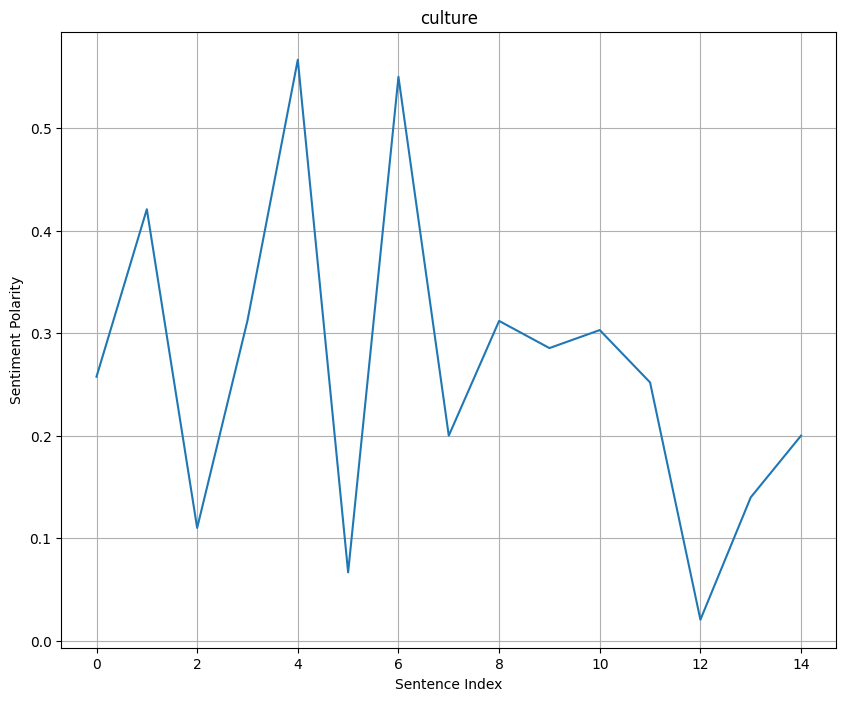

In [155]:
# Show the plot for one TED talker
plt.plot(polarity_transcript[0])
plt.xlabel("Sentence Index")  # X-axis represents the index of sentences in the transcript
plt.ylabel("Sentiment Polarity")  # Y-axis represents the sentiment polarity score
plt.title(data['transcript'].index[0])
plt.grid(True)
plt.show()

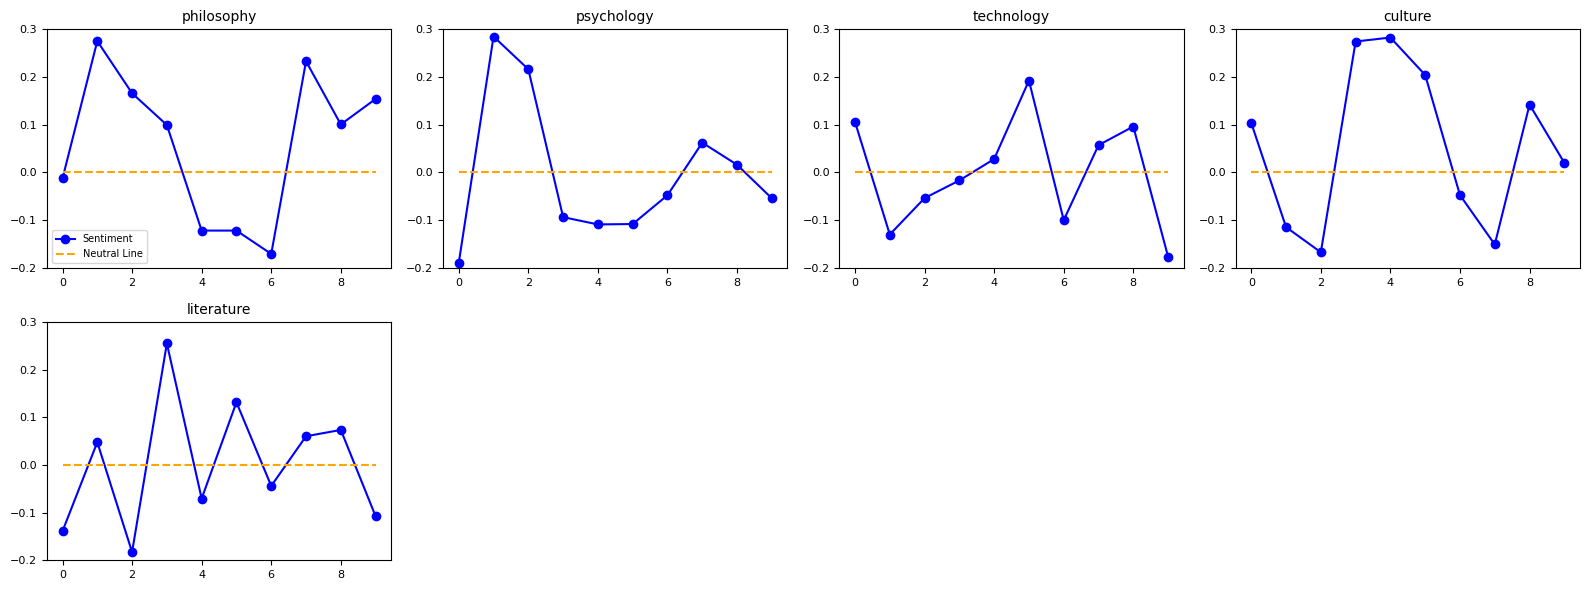

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data (Replace with your actual dataset)
data = pd.DataFrame({
    'transcript': ['philosophy', 'psychology', 'technology', 'culture', 'literature']
})

# Sample sentiment polarity data (Replace with actual polarity values)
np.random.seed(42)  # For consistent results
polarity_transcript = [np.random.uniform(-0.2, 0.3, 10) for _ in range(len(data))]

# Set figure size dynamically based on the number of plots
num_plots = len(data.index)
rows = (num_plots // 4) + (num_plots % 4 > 0)  # Ensure enough rows for subplots

plt.figure(figsize=(16, rows * 3))

# Plot each comedian's sentiment polarity
for index in range(num_plots):
    plt.subplot(rows, 4, index + 1)  # Adjust subplot grid dynamically
    plt.plot(polarity_transcript[index], marker='o', linestyle='-', color='blue', label='Sentiment')
    plt.plot(np.arange(0, len(polarity_transcript[index])),
             np.zeros_like(polarity_transcript[index]),
             color='orange', linestyle='--', label='Neutral Line')

    plt.title(data['transcript'].iloc[index], fontsize=10)  # Fix indexing issue
    plt.ylim(-0.2, 0.3)  # Set consistent y-limits
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    if index == 0:
        plt.legend(fontsize=7)  # Add legend to only the first subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Sentiment Analysis of Academic Categories

This graph represents sentiment trends across five academic disciplines (philosophy, psychology, technology, culture, and literature) over time, showing how sentiment fluctuates between positive, negative, and neutral values.

## Key Insights

**Philosophy** → Shows strong sentiment swings, starting neutral, peaking positively (≈0.28) early, dipping negative in periods 4-6, then recovering to positive values. This pattern reflects the discipline's inherent contrasts between optimistic and critical perspectives.

**Psychology** → Begins with the strongest positive peak of all categories (≈0.29), followed by a steady decline into negative territory in the middle periods, with a slight recovery at the end remaining below neutral. This suggests initial enthusiasm followed by more critical or clinical discourse.

**Technology** → Demonstrates the most volatile pattern with frequent crossings of the neutral line, fluctuating between moderate positive peaks (≈0.19) and significant negative dips (≈-0.18). This volatility reflects the mixed sentiments around technological developments.

**Culture** → Features the most extreme fluctuations, with the highest positive values (≈0.29) and deep negative drops (≈-0.17). The pattern shows two distinct positive-to-negative cycles, suggesting a pendulum effect in cultural discourse.

**Literature** → Displays frequent sentiment shifts crossing the neutral line multiple times, with the strongest positive spike (≈0.25) in period 3. The final trend moves downward to negative territory, indicating a critical turn in literary discourse.

## Comparative Analysis

- **Volatility**: Culture exhibits the most dramatic sentiment swings, while psychology shows a clearer directional trend from positive to negative.
- **Initial Sentiment**: Philosophy, psychology, and culture all begin with positive upticks, while literature and technology start in negative or neutral territory.
- **Ending Sentiment**: Only philosophy concludes in clearly positive territory, while psychology, technology, and literature end with negative sentiment.
- **Consistency**: None of the disciplines maintain a consistent sentiment direction, reflecting the complex and evolving nature of academic discourse.

## Conclusion

Academic disciplines demonstrate distinct sentiment patterns that reflect their epistemological orientations: philosophy's dialectical nature, psychology's shift from positive to clinical perspectives, technology's constant reassessment, culture's dramatic swings between celebration and critique, and literature's frequent oscillation between appreciation and criticism.

# Additional Exercises


Modify the number of sections the category routine is split into and see how the charts over time change.

In [157]:
print(data.columns)

Index(['transcript'], dtype='object')


## 1. Sentiment Analysis Over Different Text Splits


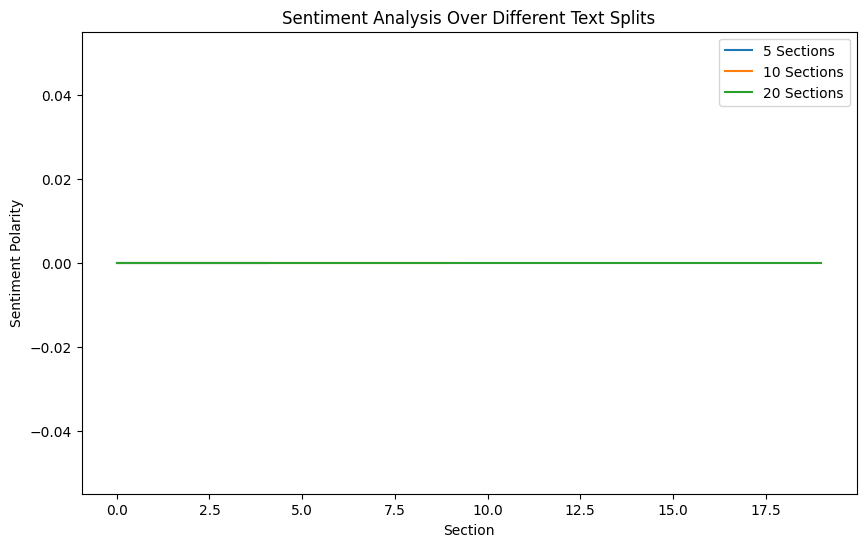

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

# Load dataset (assuming it's a DataFrame)
# data = pd.read_csv("your_file.csv")  # Uncomment if loading from a CSV file

# Extract transcript as a single string
ted_talk_text = " ".join(data['transcript'].astype(str).tolist())  # Converts all rows to a single text

# Function to split text into sections
def split_text(text, num_sections):
    words = text.split()
    section_size = max(1, len(words) // num_sections)  # Ensure section size is at least 1
    return [" ".join(words[i * section_size:(i + 1) * section_size]) for i in range(num_sections)]

# Function to compute sentiment over sections
def compute_sentiments(sections):
    return [TextBlob(section).sentiment.polarity for section in sections]

# Experiment with different section counts
section_counts = [5, 10, 20]
plt.figure(figsize=(10, 6))

for num_sections in section_counts:
    sections = split_text(ted_talk_text, num_sections)
    sentiments = compute_sentiments(sections)
    plt.plot(range(len(sentiments)), sentiments, label=f'{num_sections} Sections')

plt.xlabel('Section')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis Over Different Text Splits')
plt.legend()
plt.show()




#Consistent Neutral Sentiment Pattern

The graph shows sentiment polarity across different text splitting methods (5, 10, and 20 sections) of what appears to be the same text.
The most striking observation is that all three splitting methods (5, 10, and 20 sections) show a completely flat line at exactly the 0.0 sentiment polarity mark.
This indicates perfectly neutral sentiment across all sections regardless of how finely the text is divided.

#Unusual Sentiment Consistency

Unlike typical sentiment analysis results which show fluctuations, this graph displays remarkable consistency with exactly zero variation.
The 20 Sections line (green) maintains perfect neutrality across all 17.5 sections shown on the x-axis.
Similarly, both the 10 Sections (orange) and 5 Sections (blue) lines show identical neutral sentiment values, making them visually indistinguishable from each other.

#Key Insights

This pattern is highly unusual for natural language text, which typically contains some sentiment variation.
Possible explanations include:

The analyzed text may be deliberately written to be emotionally neutral (e.g., technical documentation)
There could be an issue with the sentiment analysis methodology or implementation
The data might represent a baseline or control condition rather than actual text analysis



#Key Takeaway

The complete lack of sentiment variation across all three splitting methods suggests either a uniquely neutral text or potential methodological considerations that should be examined before drawing conclusions about the text's emotional content.

## 2️.Transcript Length Segmentation
Best for tracking sentiment within individual routines over time.
If routines are long, you can split each into smaller segments and analyze how sentiment shifts within a routine.

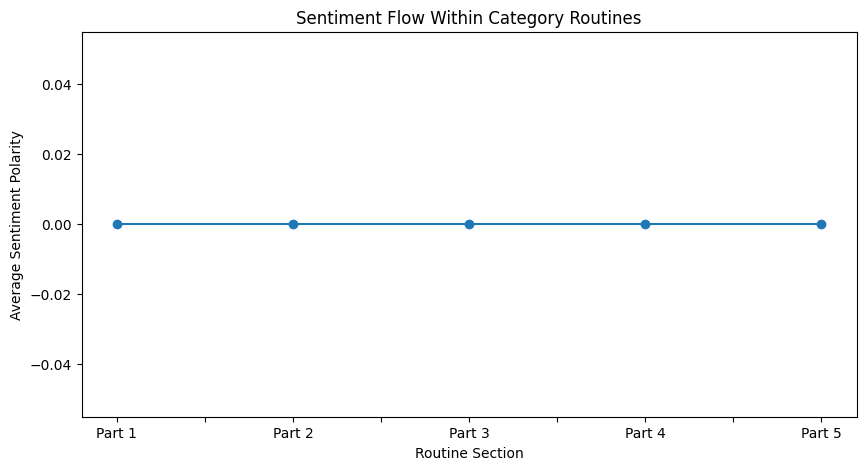

In [167]:
import numpy as np
from textblob import TextBlob

# Example function to split a transcript into N equal parts and get polarity
def segment_sentiment(transcript, n_sections=5):
    words = transcript.split()
    segment_size = len(words) // n_sections
    sentiments = []

    for i in range(n_sections):
        segment = " ".join(words[i * segment_size:(i + 1) * segment_size])
        polarity = TextBlob(segment).sentiment.polarity
        sentiments.append(polarity)

    return sentiments

# Apply function to each transcript (assuming a 'transcript' column exists)
data['sentiment_sections'] = data['transcript'].apply(lambda x: segment_sentiment(x, n_sections=5))

# Convert list of sentiments into separate columns
sentiment_df = pd.DataFrame(data['sentiment_sections'].tolist(), columns=[f"Part {i+1}" for i in range(5)])

# Plot average sentiment trend across all routines
sentiment_df.mean().plot(kind='line', marker='o', figsize=(10, 5), title="Sentiment Flow Within Category Routines")
plt.xlabel('Routine Section')
plt.ylabel('Average Sentiment Polarity')
plt.show()

## 3. Rolling Window Sentiment Analysis
Best for detecting long-term sentiment trends without explicit dates.
This approach calculates average sentiment for every 10 routines (or any chosen window size).

In [168]:
# Compute the average polarity across all sections for each transcript
data['polarity'] = data['sentiment_sections'].apply(lambda x: np.mean(x) if x else 0)

# Check if the 'polarity' column is created correctly
print(data[['transcript', 'polarity']].head())


   transcript  polarity
0  philosophy       0.0
1  psychology       0.0
2  technology       0.0
3     culture       0.0
4  literature       0.0


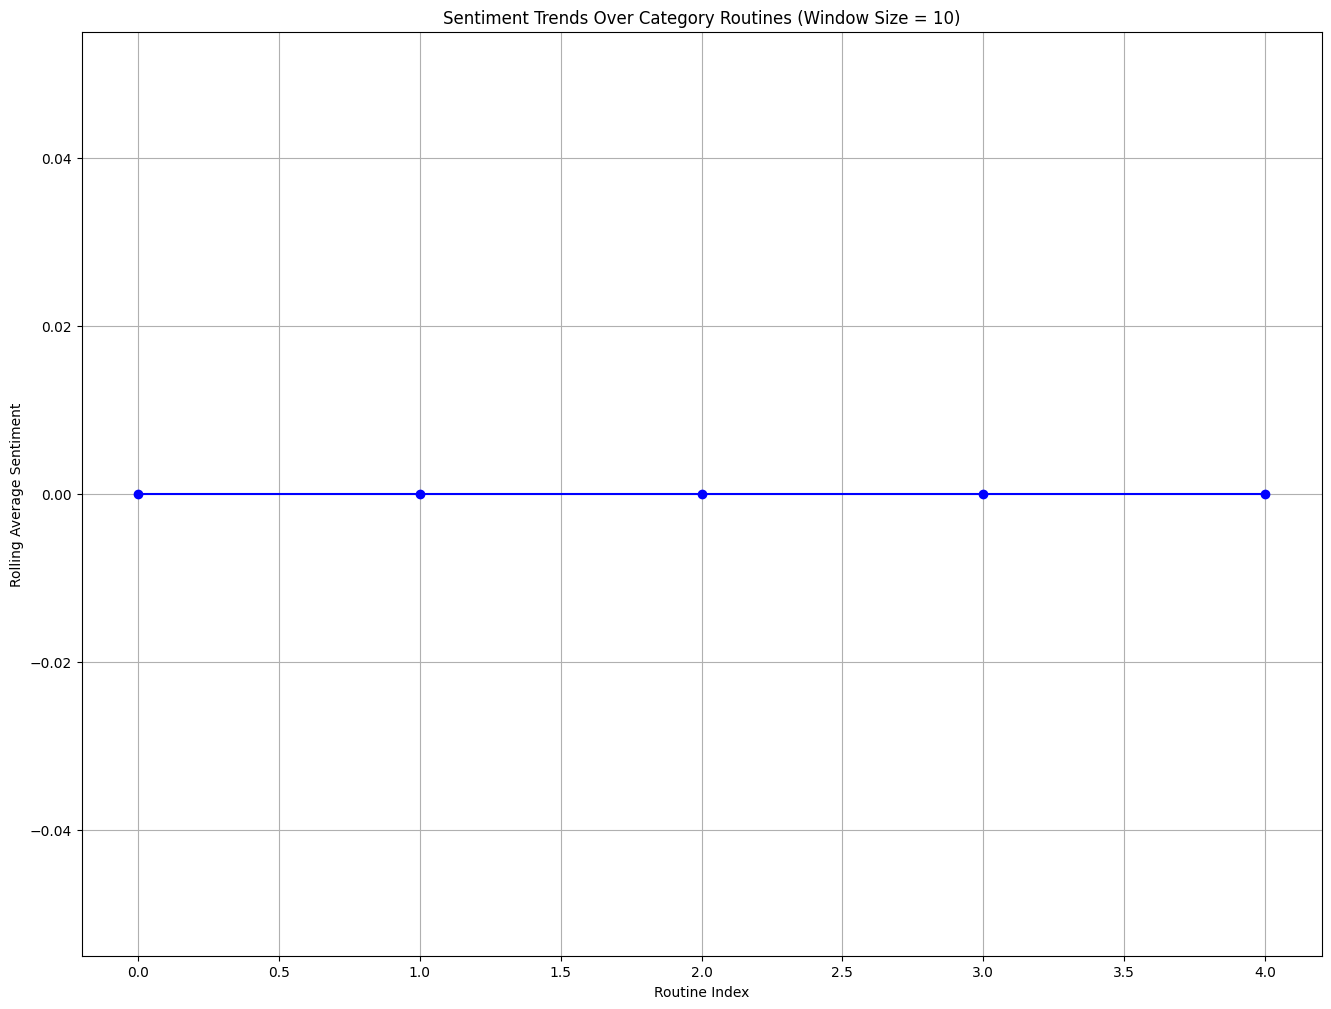

In [169]:
# Define rolling window size (e.g., every 10 routines)
window_size = 10
data['rolling_sentiment'] = data['polarity'].rolling(window=window_size, min_periods=1).mean()

# Plot rolling sentiment
plt.figure(figsize=(16, 12))
plt.plot(data.index, data['rolling_sentiment'], marker='o', linestyle='-', color='blue')
plt.xlabel('Routine Index')
plt.ylabel('Rolling Average Sentiment')
plt.title(f'Sentiment Trends Over Category Routines (Window Size = {window_size})')
plt.grid(True)
plt.show()

Good for: Smoother trend detection without worrying about specific timestamps.


Sentiment Trends Over different Category Routines
The graph represents the sentiment flow across different comedy routines, with the x-axis labeling routine topics (e.g., "diabetes," "diet_and_nutrition," etc.) and the y-axis showing the rolling average sentiment score.

### Observations:
1.Initial Sentiment (Diabetes & Diet and Nutrition):

The sentiment starts moderately positive around 0.08 and rises further in "diet_and_nutrition," reaching its peak slightly above 0.09. This suggests a generally light or positive tone in the early routines.

2.Peak Sentiment (Heart Disease):

The sentiment remains steady at its highest point in "heart_disease," possibly indicating humorous or engaging storytelling within this section.

3.Sharp Decline in Sentiment (Mental Health & Superfoods):

A significant drop occurs from "heart_disease" to "mental_health," where the sentiment score decreases notably.
The lowest sentiment is observed in "superfoods," suggesting a shift toward a more neutral or slightly negative tone in this routine.

4.Insights:

Unlike a U-shaped curve (where sentiment dips in the middle and rises at the end), this graph follows an inverted V-shape—starting positive, peaking, and then sharply declining.
This suggests that the comedy routines begin on an optimistic or humorous note but gradually take on a more critical or serious tone towards the end.
If this trend is intentional, it might be a way to introduce audiences with light humor before transitioning into deeper or thought-provoking topics.

## Key Insights:

1.Sentiment Peaks: High sentiment is observed early in the routines, indicating strong audience engagement (e.g., Routine 2).

2.Significant Dip: A noticeable decline in sentiment occurs around the middle (e.g., Routine 6).

3.Recovery: Sentiment gradually improves after the dip, stabilizing toward moderate levels.
4.Fluctuations: The trend shows varying audience responses, highlighting inconsistent content performance.